# Spectral Power Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### De lo hallado en el desarrollo, se tiene:

$$S_{x}(f)=1.81+1.8\text{cos}(4\pi f) $$ 

Text(0, 0.5, '$S_x(f)$')

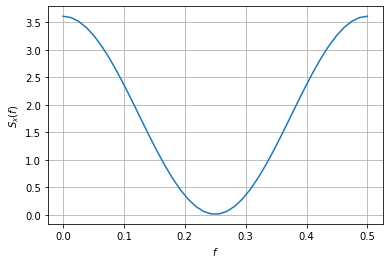

In [2]:
f = np.linspace(0,0.5,num=40)
Sx_f = 1.81 + 1.8*np.cos(4*np.pi*f)

plt.plot(f, Sx_f)
plt.grid('on')
plt.xlabel('$f$')
plt.ylabel('$S_x(f)$')

In [3]:
print(f[np.argmin(Sx_f)])

0.2564102564102564


### Se obseba la función espectral de potencia, con un mínimo en la frecuencia 0.2564.

### Para la varianza, se conseidera:
$$\text{Var}(\hat{A})=\frac{1}{\mathbf{s}^{T}\mathbf{C}^{-1}\mathbf{s}}$$


In [4]:
N=40
n = np.arange(N)

### Cálculo de la matriz C

In [5]:
C = np.zeros([N,N])
np.fill_diagonal(C, 1.81, wrap=False) 

for i in np.arange(N):
    for j in np.arange(N):
        if (np.abs(i-j) == 2): C[i,j] = 0.9
            
C_1 = np.linalg.inv(C)
print(C)

[[1.81 0.   0.9  ... 0.   0.   0.  ]
 [0.   1.81 0.   ... 0.   0.   0.  ]
 [0.9  0.   1.81 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.81 0.   0.9 ]
 [0.   0.   0.   ... 0.   1.81 0.  ]
 [0.   0.   0.   ... 0.9  0.   1.81]]


### Cálculo y gráfico de la varianza de $(\hat{A})$ para f normalizado de 0 a 0.5:

In [6]:
i = 0
var_A_f = np.zeros(40)
for fn  in np.linspace(0,0.5,num=40):
    s = np.cos(2*np.pi*fn*n).reshape(-1, 1)
    var_A_f[i] = 1 / (np.transpose(s) @ C_1 @ s)
    i = i+1

Text(0, 0.5, '$Var(f)$')

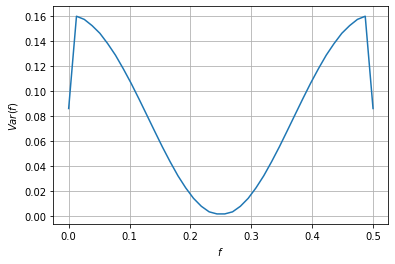

In [7]:
plt.plot(f, var_A_f)
plt.grid('on')
plt.xlabel('$f$')
plt.ylabel('$Var(f)$')

In [8]:
print(f[np.argmin(var_A_f)])

0.2564102564102564


### Se observa que la varianza es mínima para la frecuencia de 0.2564.